# **1. Load the banking dataset**

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv("bank_data.csv")
df

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540000,Level 0 Recovery,19,Male
1,1150,486,416.090000,Level 0 Recovery,25,Female
2,380,527,429.350000,Level 0 Recovery,27,Male
3,1838,536,296.990000,Level 0 Recovery,25,Male
4,1995,541,346.385000,Level 0 Recovery,34,Male
...,...,...,...,...,...,...
1877,361,9785,15388.195990,Level 4 Recovery,65,Female
1878,196,9857,9709.909257,Level 4 Recovery,68,Female
1879,313,9859,30209.181790,Level 4 Recovery,58,Female
1880,1781,9920,20386.232190,Level 4 Recovery,67,Female


**Checking for any missing values**

In [ ]:
df.dropna()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540000,Level 0 Recovery,19,Male
1,1150,486,416.090000,Level 0 Recovery,25,Female
2,380,527,429.350000,Level 0 Recovery,27,Male
3,1838,536,296.990000,Level 0 Recovery,25,Male
4,1995,541,346.385000,Level 0 Recovery,34,Male
...,...,...,...,...,...,...
1877,361,9785,15388.195990,Level 4 Recovery,65,Female
1878,196,9857,9709.909257,Level 4 Recovery,68,Female
1879,313,9859,30209.181790,Level 4 Recovery,58,Female
1880,1781,9920,20386.232190,Level 4 Recovery,67,Female


# **2. Graphical Exploratory Data Analysis**

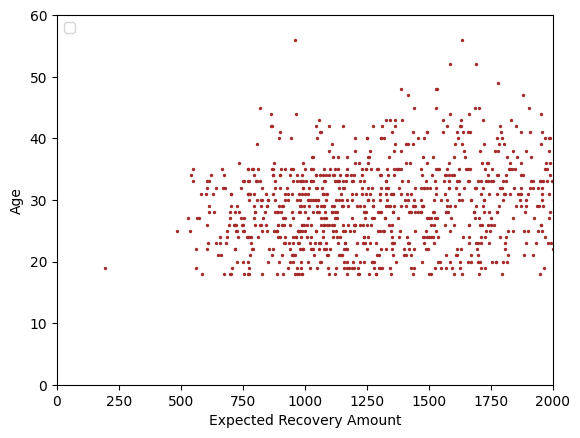

In [ ]:
plt.scatter(x = df['expected_recovery_amount'], y = df['age'], c = 'brown', s = 2)
plt.xlim(0, 2000) #limit expected recovery amount to $2000
plt.ylim(0, 60) #to avoid non-data whitespace
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Age')
plt.legend(loc = 2)
plt.show()

# **3. Statistical test: age vs. expected recovery amount**

In [ ]:
from scipy import stats

#Compute average age just below & above threshold ($1000)
era_900_1100 = df.loc[(df['expected_recovery_amount']<=1100) &
                      (df['expected_recovery_amount']>=900)]

# Perform Kruskal-Wallis test
Level_0_age = era_900_1100.loc[df['recovery_strategy']=="Level_0_Age"]['age']
Level_1_age = era_900_1100.loc[df['recovery_strategy']=="Level_1_Age"]['age']
stats.kruskal(Level_0_age, Level_1_age)

KruskalResult(statistic=nan, pvalue=nan)

# **4. Statistical test: sex vs. expected recovery amount**

In [ ]:
# Number of customers in each category
# Compute the crosstab of sex and recovery_strategy
crosstab = pd.crosstab(df.loc[(df['expected_recovery_amount']<=1100) &
                              (df['expected_recovery_amount']>=900)]['recovery_strategy'],
                       df['sex'])
print(crosstab)

# Chi-square test
chi2_stat, p_val, dof, ex = stats.chi2_contingency(crosstab)
print(f"Chi-square statistic: {chi2_stat}")
print('p-val is: ', p_val)

sex                Female  Male
recovery_strategy              
Level 0 Recovery       32    57
Level 1 Recovery       40    55
Chi-square statistic: 0.49435761688866475
p-val is:  0.48198988397369014


# **5. Exploratory graphical analysis: recovery amount(actual vs expected)**

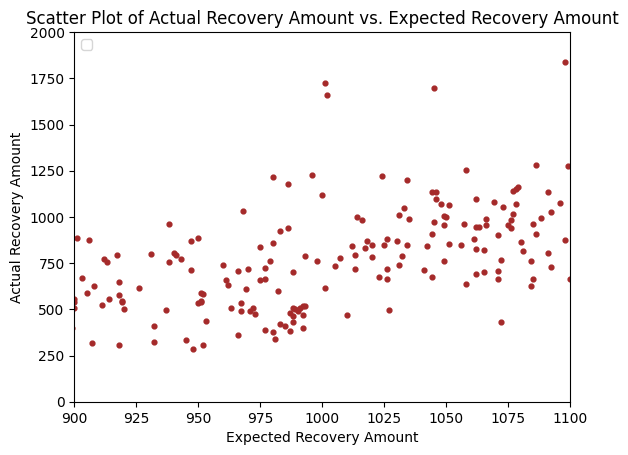

In [ ]:
# Scatterplot: Actual Recovery Amount vs Expected Recovery Amount
plt.scatter(x = df['expected_recovery_amount'], y = df['actual_recovery_amount'], c = "brown", s =12)
plt.xlim(900, 1100) #just below, just above threshold
plt.ylim(0, 2000)
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Actual Recovery Amount')
plt.title("Scatter Plot of Actual Recovery Amount vs. Expected Recovery Amount")
plt.legend(loc = 2)
plt.show()

# **6. Statistical analysis: recovery amount**

**Compute average actual recovery amount just below and above the threshold**

In [ ]:
era_950_1050 = df.loc[(df['expected_recovery_amount'] < 1050) &
                      (df['expected_recovery_amount'] >= 950)]

by_recovery_strategy_narrow = era_950_1050.groupby(['recovery_strategy'])
avg_recovery_by_strategy_narrow = by_recovery_strategy_narrow['actual_recovery_amount'].mean()
print("average actual recovery amount by recovery strategy (narrow Range):")
print(avg_recovery_by_strategy_narrow)

average actual recovery amount by recovery strategy (narrow Range):
recovery_strategy
Level 0 Recovery    626.140273
Level 1 Recovery    947.035496
Name: actual_recovery_amount, dtype: float64


In [ ]:
Level_0_actual = era_900_1100.loc[df['recovery_strategy']=='Level 0 Recovery']['actual_recovery_amount']
Level_1_actual = era_900_1100.loc[df['recovery_strategy']=='Level 1 Recovery']['actual_recovery_amount']
stats.kruskal(Level_0_actual, Level_1_actual)

KruskalResult(statistic=64.89840778685254, pvalue=7.886077128395961e-16)

**Kruskal-Wallis test for the narrower range**

In [ ]:
era_950_1050 = df.loc[(df['expected_recovery_amount']<=1050) &
                      (df['expected_recovery_amount']>=950)]

Level_0_actual = era_950_1050.loc[df['recovery_strategy']=='Level 0 Recovery']['actual_recovery_amount']
Level_1_actual = era_950_1050.loc[df['recovery_strategy']=='Level 1 Recovery']['actual_recovery_amount']
stats.kruskal(Level_0_actual, Level_1_actual)

KruskalResult(statistic=30.9924872487249, pvalue=2.5902913533269003e-08)

**Visualizing the narrower range**

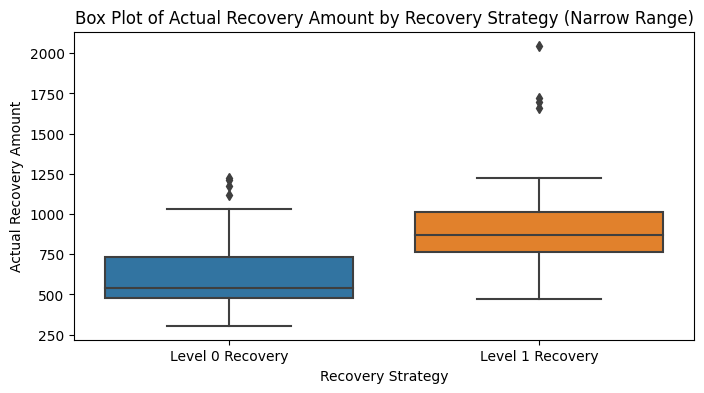

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='recovery_strategy', y='actual_recovery_amount', data=era_950_1050)
plt.xlabel("Recovery Strategy")
plt.ylabel("Actual Recovery Amount")
plt.title("Box Plot of Actual Recovery Amount by Recovery Strategy (Narrow Range)")
plt.show()

# **7. Regression modeling: no threshold**

In [ ]:
# Import statsmodels
import statsmodels.api as sm

# Define X and y
X = era_900_1100['expected_recovery_amount']
y = era_900_1100['actual_recovery_amount']
X = sm.add_constant(X)

# Build linear regression model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the model summary statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.253
Model:                                OLS   Adj. R-squared:                  0.248
Method:                     Least Squares   F-statistic:                     61.48
Date:                    Thu, 05 Oct 2023   Prob (F-statistic):           3.65e-13
Time:                            09:08:31   Log-Likelihood:                -1286.5
No. Observations:                     184   AIC:                             2577.
Df Residuals:                         182   BIC:                             2583.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1918.4549    346.395     -5.538      0.000   -2601.920   -1234.989
expected_recovery_amount     2.6956      0.344      7.841      0.000       2.017       3.374
==============================================================================
Omnibus:                       64.512   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.639
Skew:                           1.457   Prob(JB):                     4.89e-41
Kurtosis:                       6.965   Cond. No.                     1.79e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

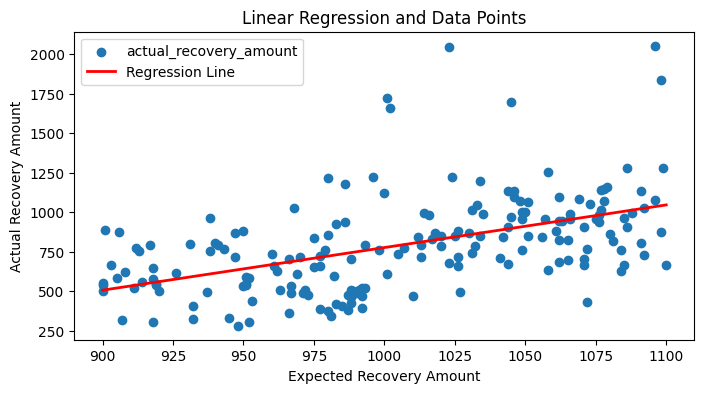

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(x='expected_recovery_amount', y='actual_recovery_amount', data=era_900_1100)
plt.plot(era_900_1100['expected_recovery_amount'], predictions, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Expected Recovery Amount")
plt.ylabel("Actual Recovery Amount")
plt.title("Linear Regression and Data Points")
plt.legend()
plt.show()

# **8. Regression modeling: adding true threshold**

In [ ]:
# Create indicator (0 or 1) for expected recovery amount >= $1000
df['indicator_1000'] = np.where(df['expected_recovery_amount']<1000, 0, 1)
era_900_1100 = df.loc[(df['expected_recovery_amount']<=1100) &
                      (df['expected_recovery_amount']>=900)]

# Define X and y
X = era_900_1100[['expected_recovery_amount', 'indicator_1000']]
y = era_900_1100['actual_recovery_amount']
X = sm.add_constant(X)

# Build linear regression model
model = sm.OLS(y,X).fit()

# Print the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.309
Model:                                OLS   Adj. R-squared:                  0.301
Method:                     Least Squares   F-statistic:                     40.43
Date:                    Thu, 05 Oct 2023   Prob (F-statistic):           3.06e-15
Time:                            09:09:49   Log-Likelihood:                -1279.3
No. Observations:                     184   AIC:                             2565.
Df Residuals:                         181   BIC:                             2574.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       98.8272    622.659      0.159      0.874   -1129.777    1327.431
expected_recovery_amount     0.5430      0.651      0.834      0.406      -0.742       1.828
indicator_1000             284.0296     73.988      3.839      0.000     138.041     430.019
==============================================================================
Omnibus:                       66.386   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.158
Skew:                           1.512   Prob(JB):                     1.39e-41
Kurtosis:                       6.924   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

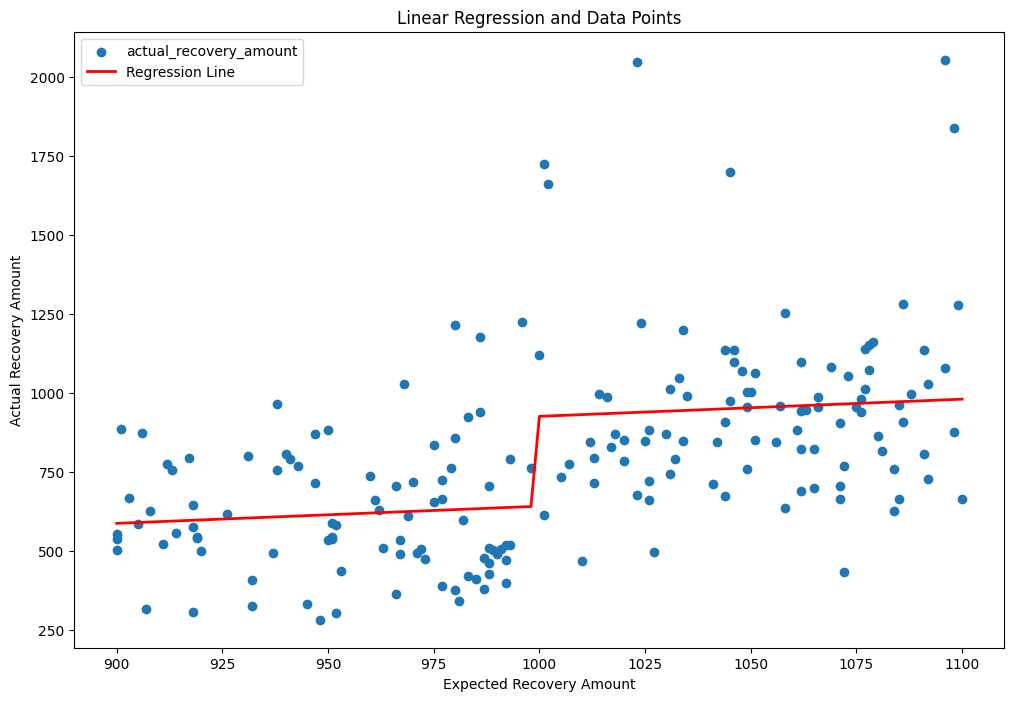

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(x='expected_recovery_amount', y='actual_recovery_amount', data=era_900_1100)
plt.plot(era_900_1100['expected_recovery_amount'], model.fittedvalues, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Expected Recovery Amount")
plt.ylabel("Actual Recovery Amount")
plt.title("Linear Regression and Data Points")
plt.legend()
plt.show()

# **9. Regression modeling: adjusting the window**

In [ ]:
# Redefine era_950_1050 so the indicator variable is included
era_950_1050 = df.loc[(df['expected_recovery_amount']<=1050) &
                      (df['expected_recovery_amount']>=950)]

# Define X and y
X = era_950_1050[['expected_recovery_amount','indicator_1000']]
y = era_950_1050['actual_recovery_amount']
X = sm.add_constant(X)

# Build linear regression model
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.287
Model:                                OLS   Adj. R-squared:                  0.273
Method:                     Least Squares   F-statistic:                     19.55
Date:                    Thu, 05 Oct 2023   Prob (F-statistic):           7.33e-08
Time:                            09:11:54   Log-Likelihood:                -699.42
No. Observations:                     100   AIC:                             1405.
Df Residuals:                          97   BIC:                             1413.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -310.8225   1808.751     -0.172      0.864   -3900.692    3279.047
expected_recovery_amount     0.9510      1.854      0.513      0.609      -2.728       4.630
indicator_1000             285.5160    110.391      2.586      0.011      66.421     504.611
==============================================================================
Omnibus:                       39.881   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.700
Skew:                           1.568   Prob(JB):                     4.05e-19
Kurtosis:                       6.239   Cond. No.                     6.76e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

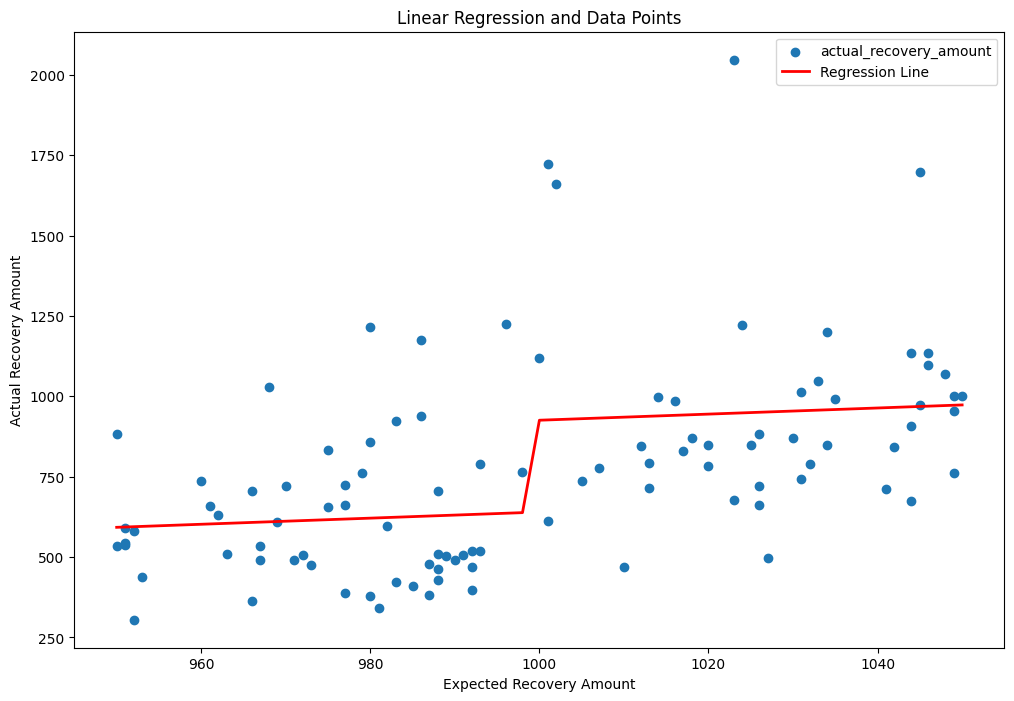

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(x='expected_recovery_amount', y='actual_recovery_amount', data=era_950_1050)
plt.plot(era_950_1050['expected_recovery_amount'], model.fittedvalues, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Expected Recovery Amount")
plt.ylabel("Actual Recovery Amount")
plt.title("Linear Regression and Data Points")
plt.legend()
plt.show()

**Whether we use a wider range (900 to 1100) or a narrower range (950 to 1050), the additional amount we recover with the higher recovery strategy is much more than the 50 dollar per customer it costs for that strategy. So, we can confidently say that the higher recovery strategy is worth the extra cost of $50 per customer.**